# **Project Domain**

**Dataset Source:**

https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset

This dataset is a comprehensive health and demographic dataset consisting of information from 100,000 individuals. The primary purpose of this dataset is to support diabetes-related research and the development of data-driven predictive models.

**The dataset includes a wide range of important attributes, such as:**

1. Gender

2. Age

3. Location

4. Race or Ethnicity

5. Hypertension History

6. Heart Disease History

7. Smoking History

8. Body Mass Index (BMI)

9. HbA1c Level (Glycated Hemoglobin)

10. Blood Glucose Level

11. Diabetes Status

**With its well-structured format and large sample size, this dataset is highly suitable for:**

1. Exploring diabetes risk patterns

2. Classifying diabetes status

3. Testing various machine learning algorithms for individual health prediction

# **Project Description**

This project aims to develop a diabetes prediction system using a healthcare dataset consisting of 100,000 individuals, which includes both demographic and clinical information. Through this approach, the project seeks to support healthcare professionals and medical institutions in making faster and more accurate decisions, while also promoting preventive interventions for high-risk population groups.

# 1. Import Required Libraries

In [14]:
# Data loading
from google.colab import files
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Model
from sklearn.neighbors import KNeighborsClassifier  # KNN Model

# Evaluation metrics
from sklearn.metrics import confusion_matrix

# 2. Data Understanding

Data Understanding is the process of exploring and analyzing the information contained within the dataset in order to assess its structure, characteristics, and overall data quality.


In [15]:
# Load the dataset
url = "https://drive.google.com/uc?id=1CJn1NN3KsxTZva53ZjMv8fE0MXRiEqe6"
df = pd.read_csv(url)

Display the structure of the data

In [16]:
# Display the structure of the data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (100000, 16)


In [17]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [18]:
print("\nInfo of the dataset:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [19]:
print("\nDescriptive statistics:\n", df.describe())


Descriptive statistics:
                 year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the initial process of investigating a dataset to analyze its characteristics, identify patterns, detect anomalies, and examine underlying assumptions. This process typically involves the use of statistical techniques and graphical representations or visualizations to better understand the data.

In [20]:
# Check data types
print("\nData types:\n", df.dtypes)


Data types:
 year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object


In [21]:
# Descriptive statistics including all
print("\nDescriptive statistics including all:\n", df.describe(include='all'))


Descriptive statistics including all:
                  year  gender            age  location  race:AfricanAmerican  \
count   100000.000000  100000  100000.000000    100000         100000.000000   
unique            NaN       3            NaN        55                   NaN   
top               NaN  Female            NaN  Kentucky                   NaN   
freq              NaN   58552            NaN      2038                   NaN   
mean      2018.360820     NaN      41.885856       NaN              0.202230   
std          1.345239     NaN      22.516840       NaN              0.401665   
min       2015.000000     NaN       0.080000       NaN              0.000000   
25%       2019.000000     NaN      24.000000       NaN              0.000000   
50%       2019.000000     NaN      43.000000       NaN              0.000000   
75%       2019.000000     NaN      60.000000       NaN              0.000000   
max       2022.000000     NaN      80.000000       NaN              1.000000   


In [22]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


In [23]:
# Check for duplicates
print("\nDuplicate rows:\n", df.duplicated().sum())


Duplicate rows:
 14


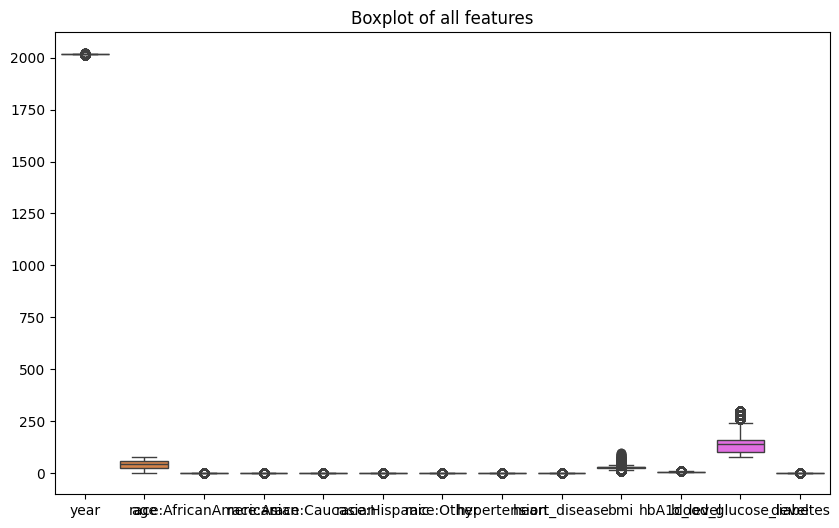

In [24]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of all features")
plt.show()

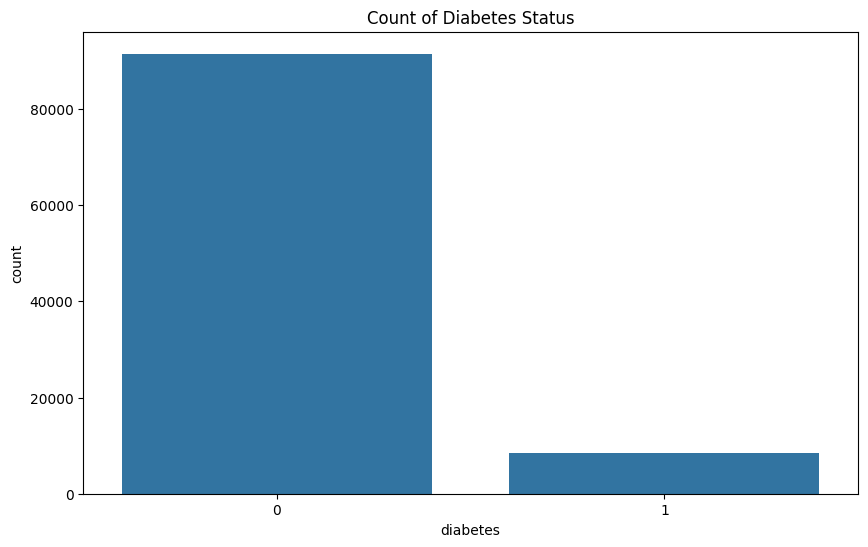

In [25]:
# Visualize the relationship between diabetes status and other variables
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=df)
plt.title("Count of Diabetes Status")
plt.show()

# 4. Data Preparation

In [26]:
# 1. Handle missing values (numeric only)
df.fillna(df.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

In [27]:
# 2. Drop irrelevant column
df.drop(columns=['year'], inplace=True)

In [28]:
# 3. Drop duplicates
df.drop_duplicates(inplace=True)

In [29]:
# 4. Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['bmi', 'hbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    df[['bmi', 'hbA1c_level', 'blood_glucose_level']]
)

In [30]:
# 5. Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'location', 'smoking_history'], drop_first=True)

**Correlation Between Variables**

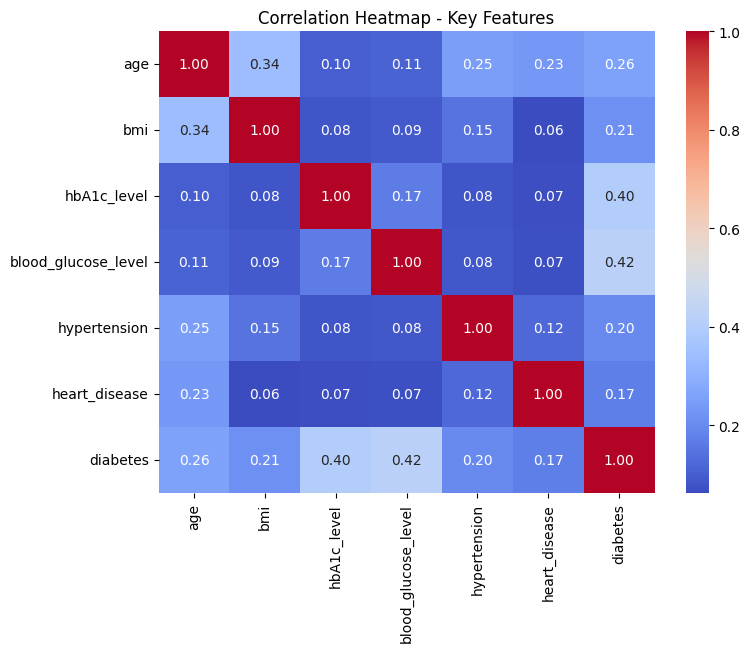

In [31]:
# Select numerical features only
selected_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
                 'hypertension', 'heart_disease', 'diabetes']

correlation_matrix = df[selected_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap - Key Features")
plt.show()

# 5. Train-Test-Split

In [32]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Model Development


KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

# 7. Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Confusion Matrix:
 [[18205   101]
 [  817   873]]

Accuracy: 0.95
Precision: 0.90
Recall: 0.52
F1 Score: 0.66


# Conclusion :

In [35]:
# Conclusion
print("\nConclusion:")
print("The KNN model with k=5 has been trained and evaluated.")
print("Accuracy, precision, recall, and F1-score indicate the model's performance in predicting diabetes status.")
print("The evaluation results can be used to understand the factors contributing to diabetes.")


Conclusion:
The KNN model with k=5 has been trained and evaluated.
Accuracy, precision, recall, and F1-score indicate the model's performance in predicting diabetes status.
The evaluation results can be used to understand the factors contributing to diabetes.
